# Task 3 Un-Supervised Machine Learning Model on Iris Dataset

We only have features, and we find patterns in features.

# Un-Supervised Machine Learning Model...

No external teachers or pre trained data.
Model detects emerging data in the input dataset.
Model then constructs patterns and Clusters.
These Machine Learning Models are further grouped into:-
    # 1) Clustering
    # 2) Association
    

In [41]:
# Importing all the library files...

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

In [42]:
# Load the iris datasets...

iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head(5) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
# Summary...

data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
# Data info and structure of the dataset...

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [45]:
# To check the dimension of the dataframe...

data.shape

(150, 4)

In [46]:
# For checking the missing values...

data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [47]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.labelsize'] = 10

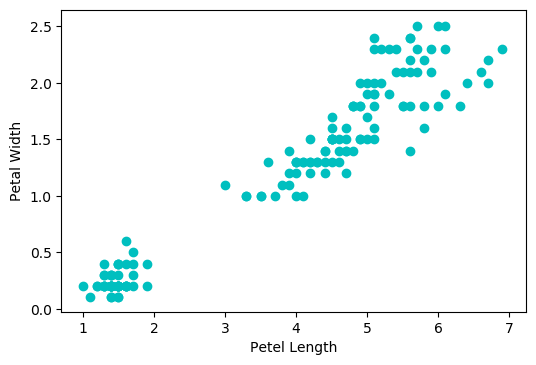

In [48]:
for i in range(0, data.shape[0]):
    plt.scatter(data["petal length (cm)"][i], data["petal width (cm)"][i], data = data, c="c"
               )
plt.xlabel("Petel Length")
plt.ylabel("Petal Width")
plt.show()


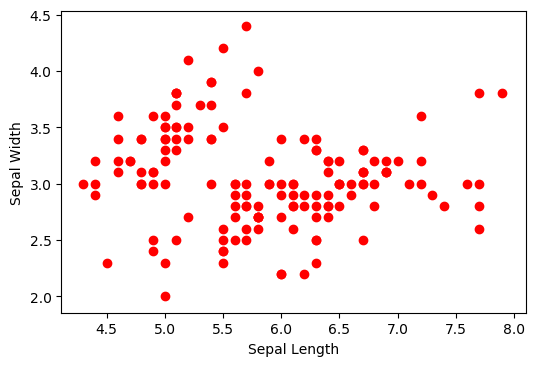

In [49]:
for i in range(0, data.shape[0]):
    plt.scatter(data["sepal length (cm)"][i], data["sepal width (cm)"][i], data = data, color="r")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


# K-Means Clustering Algorithm

Step1 : Decide Number of Clusters (K)

Step2 : Initilize your cluster centroids (Random or Custom)

Step3 : Assign each data point (object) to its closest centroid, creating a cluster

Step4 : Recalculate the position of the k centroids.

Step5 : Repeat the steps 3-4, until the centroids no longles move or algorithm converge

# Clustering

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.

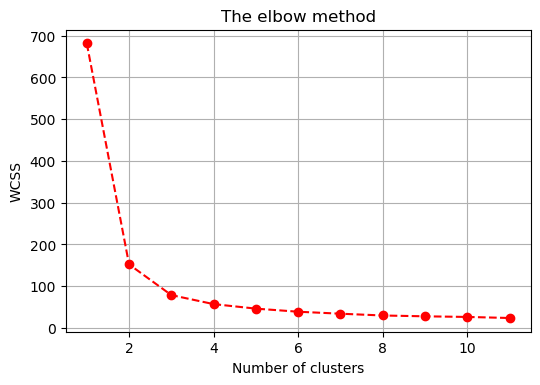

In [50]:
# Finding the optimum number of clusters for k-means classification

X = data.iloc[:, [0, 1, 2, 3]].values


wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 12), wcss, "--ro")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

In [73]:
model = KMeans(n_clusters=3)
y_predict = model.fit_predict(X_train)

In [74]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values
print("Created Labels and attributes successfully...")

Created Labels and attributes successfully...


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

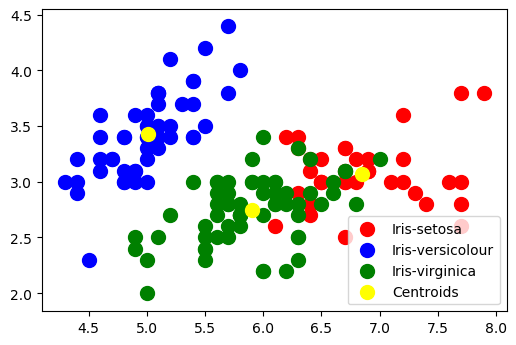

In [77]:
# Visualising the clusters - On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [80]:
# To check the accuracy of the model...

from sklearn.metrics import silhouette_score

In [81]:
s = silhouette_score(X_train,y_predict)

s

0.5559319741215443